In [39]:
# DO NOT ALTER THIS CELL OR ITS TAG. It is used by papermill to fill in these parameters and execute the notebook.
DATA_PATH = "/home/it1123/dev_local/cse284/snp_clustering/tmp/ps3_gwas_pca.eigenvec"
K_HIGH = 4

In [40]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [41]:
# set directories
REPO_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(REPO_DIR, "data")
OUT_DIR = os.path.join(REPO_DIR, "out")

## Data Loading/Preprocessing
We assume the existence of the file containing the coordinates of each sample in the eigenbasis computed by `plink` in the previous step

In [42]:
pca_data = pd.read_csv(DATA_PATH, delim_whitespace=True, header=None)

point_labels = pca_data.iloc[:, 0]
X = pca_data.iloc[:, 2:].to_numpy()

## Clustering
#### Here we cluster the principal component data using $k$-means clustering and hierarchical clustering (Ward's method, agglomerative).

### $k$-Means

In [43]:
# fit K-means, tune k
#silhouette scores as a measure of clustering quality
sil_scores = []
K = range(2, K_HIGH)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X, labels))

print (sil_scores)
optimal_k = K[sil_scores.index(max(sil_scores))]
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=256)
kmeans_optimal.fit(X)
labels_kmeans_optimal = kmeans_optimal.labels_

[0.5194421849945343, 0.5510976026316533]


In [44]:
optimal_k

3

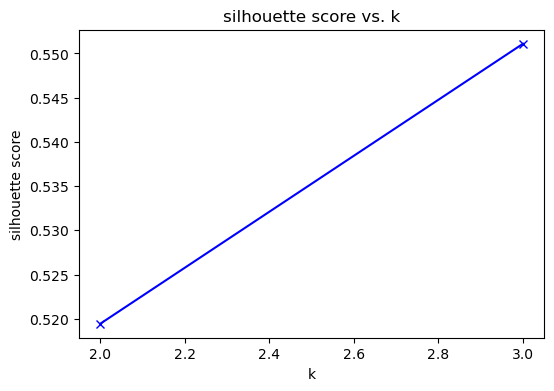

In [63]:
# plot clustering quality vs k
plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('silhouette score vs. k')
plt.show()

### Hierarchical

In [55]:
#for plotting inferred hierarchy.
#see https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

In [56]:
# do agglomerative clustering
agg_cluster = AgglomerativeClustering(metric='euclidean', linkage='ward')
labels_agg = agg_cluster.fit_predict(X)

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering')

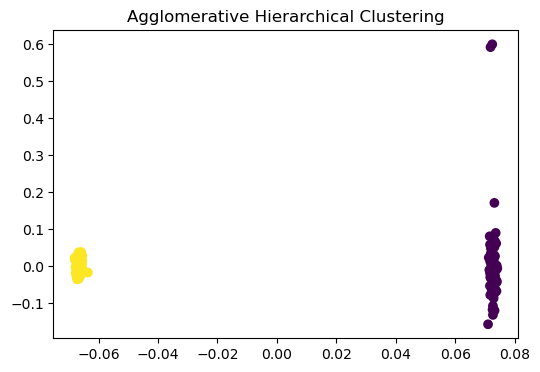

In [62]:
# results of agglomerative clustering
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis')
plt.title("Agglomerative Hierarchical Clustering")
#plt.show()

In [59]:
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# model = model.fit(X)

In [ ]:
# plt.title("Population Structure via Ward's Method")
# plot_dendrogram(model, truncate_mode="level", p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()